In [1]:
.libPaths()

[1] "/disk1/wenqing/anaconda3/envs/wq_R4.2/lib/R/library"

In [2]:
library(ggpubr)

Loading required package: ggplot2



In [3]:
library(VennDiagram)
library(colorspace)

Loading required package: grid

Loading required package: futile.logger


Attaching package: ‘VennDiagram’


The following object is masked from ‘package:ggpubr’:

    rotate




In [4]:
#####比较10X与S2有res的基因，及其上的res数量
gene_WzRes_s2 <- read.table("/disk1/wenqing/tmp_data/pbmc/result/s2/s2_geneWzRes_regular.txt")
gene_WzRes_10X <- read.table("/disk1/wenqing/tmp_data/pbmc/result/10X_Ver3/10X_geneWzRes_regular.txt")


In [5]:
dim(gene_WzRes_s2)
dim(gene_WzRes_10X)

[1] 6279    2

[1] 8904    2

In [6]:
overlap_genes <- intersect(gene_WzRes_s2$V2,gene_WzRes_10X$V2)
length(overlap_genes)

[1] 4673

In [7]:
write.table(overlap_genes,"/disk1/wenqing/tmp_data/pbmc/overlapped_genesIn2Plats.txt",quote=F,col.names=F,row.names=F)

In [39]:
colors<-qualitative_hcl(2,palette = "Set3")
colors

  venn.plot <- venn.diagram(
    x = list(
      "Smart-seq2" = gene_WzRes_s2$V2,
      "10X" = gene_WzRes_10X$V2
    ),
    filename = "/disk1/wenqing/tmp_data/pbmc/result/regular_gene_overlapped_between2platforms.jpeg",
    fill = c('red','blue'),
    cex = 1
  )

[1] "#FFB3B5" "#61D8D6"

In [40]:
rownames(gene_WzRes_s2) <- gene_WzRes_s2$V2
rownames(gene_WzRes_10X) <- gene_WzRes_10X$V2

In [41]:
sub_gene_WzRes_s2 <- gene_WzRes_s2[overlap_genes,]
sub_gene_WzRes_10X <- gene_WzRes_10X[overlap_genes,]

In [42]:
head(sub_gene_WzRes_s2)
head(sub_gene_WzRes_10X)

,V1,V2
,<int>,<chr>
AAGAB,3,AAGAB
AAK1,24,AAK1
AARS,2,AARS
AATF,13,AATF
ABAT,10,ABAT
ABCA1,3,ABCA1


,V1,V2
,<int>,<chr>
AAGAB,9,AAGAB
AAK1,54,AAK1
AARS,8,AARS
AATF,24,AATF
ABAT,6,ABAT
ABCA1,4,ABCA1


In [33]:
top50_res_s2 <- head(sub_gene_WzRes_s2[order(sub_gene_WzRes_s2$V1,decreasing=T),],50)
top50_res_10X <- head(sub_gene_WzRes_10X[order(sub_gene_WzRes_10X$V1,decreasing=T),],50)

In [34]:
intersect(top50_res_s2$V2,top50_res_10X$V2)

[1] "GNB1"     "CTSS"     "ARID4B"   "MSTO1"    "MSTO2P"   "GATAD2B" 
 [7] "CD247"    "RABGAP1L" "FAF1"     "EIF4G3"   "PUM1"     "PSMA5"   
[13] "ASH1L"    "FAM129A"  "PRPF3"    "SMYD3"    "EPS15"    "RFWD2"   
[19] "RNF115"   "TMEM57"   "F11R"     "ZCCHC11"  "PIK3CD"   "KPNA6"   
[25] "RC3H1"    "CAMTA1"

In [35]:
top50_res_s2[c('GNB1','CTSS','ARID4B'),]
top50_res_10X[c('GNB1','CTSS','ARID4B'),]

,V1,V2
,<int>,<chr>
GNB1,135,GNB1
CTSS,107,CTSS
ARID4B,90,ARID4B


,V1,V2
,<int>,<chr>
GNB1,225,GNB1
CTSS,94,CTSS
ARID4B,200,ARID4B


In [66]:
#随机抽取10个基因展示两个平台res的数量
random_ord <- sample(1:length(overlap_genes),10)
gene_res_s2 <- sub_gene_WzRes_s2[random_ord,]
gene_res_10X <- sub_gene_WzRes_10X[random_ord,]
all_res <- rbind(gene_res_s2,gene_res_10X)
platforms <- c(rep('Smart-seq2',10),rep('10X',10))
dat <- cbind(all_res[,1:2],platforms)
colnames(dat) <- c('res_num','gene','platform')
dat

,res_num,gene,platform
,<int>,<chr>,<chr>
VPS33A,5,VPS33A,Smart-seq2
SVIL,14,SVIL,Smart-seq2
CCL5,32,CCL5,Smart-seq2
G3BP1,2,G3BP1,Smart-seq2
RNF10,4,RNF10,Smart-seq2
TMEM184C,2,TMEM184C,Smart-seq2
PPP3CB,8,PPP3CB,Smart-seq2
NECAP1,3,NECAP1,Smart-seq2
RP11-958N24.1,6,RP11-958N24.1,Smart-seq2


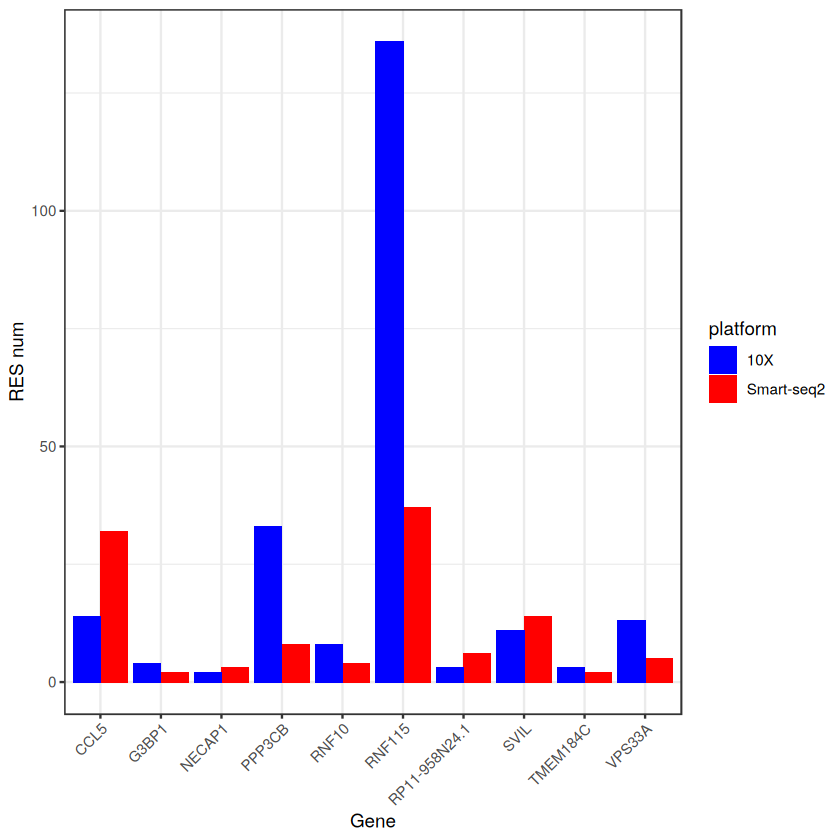

In [69]:
ggplot(dat,aes(gene,as.numeric(res_num),fill=platform))+
  geom_bar(stat="identity",position="dodge")+
  theme(panel.background = element_blank(),
        axis.text.x = element_text(angle=45,size=10,color = 'black'),
        axis.title.y = element_text(size = 14,color = 'black'),
        axis.text.y = element_text(size = 12,color = 'black'),
        axis.ticks.y = element_blank(),
        plot.title = element_text(hjust = .5),
        legend.position = "none") +
  theme_bw() +
  ylab('RES num') +
  xlab('Gene') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(
    values=c("10X"="blue","Smart-seq2"="red"), 
    labels=c("10X","Smart-seq2"))


In [56]:
#计算s2比10X多的占比
s2_gene_more_res <- c()
tenX_gene_more_res <- c()
for(one in overlap_genes){
    if(sub_gene_WzRes_10X[one,1] < sub_gene_WzRes_s2[one,1]){
        s2_gene_more_res <- c(s2_gene_more_res,one)
    }else if(sub_gene_WzRes_10X[one,1] > sub_gene_WzRes_s2[one,1]){
        tenX_gene_more_res <- c(tenX_gene_more_res,one)
    }
}

In [57]:
length(s2_gene_more_res)/length(overlap_genes)
length(tenX_gene_more_res)/length(overlap_genes)

[1] 0.1977316

[1] 0.7355018

In [58]:
#挑选一个s2比10X多的，少的
sub_gene_WzRes_s2[which.max(sub_gene_WzRes_s2$V1),]
sub_gene_WzRes_10X[which.max(sub_gene_WzRes_10X$V1),]


,V1,V2
,<int>,<chr>
POLR2J2,288,POLR2J2


,V1,V2
,<int>,<chr>
POLR2J2,448,POLR2J2


In [ ]:
sub_gene_WzRes_10X['FLNA',]
sub_gene_WzRes_s2['RP11-420N3.2',]
6826015-5289802
153576891-153603006

In [69]:
#####FLNA编辑位点可视化
library(trackViewer) #主要画图包
library(RColorBrewer) #引入颜色包


Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb



In [131]:
#FLNA
res_s2 <-  read.table("/disk1/wenqing/tmp_data/10X_smartseq2/result/s2/all_140_ESC/FLNA.txt")$V1# 指定SNP 坐标位置
res_10X <- read.table("/disk1/wenqing/tmp_data/10X_smartseq2/result/10X/all_140_ESC/FLNA.txt")$V1

all_res <- c(unique(res_s2),unique(res_10X))

all_res_wzSample <- as.data.frame(cbind(all_res,c(rep('Smart-seq2',times=78),rep('10X',times=15))))

exon_widths <- c(250,200,130,130,130,180,120,100,170,140,130,80)



In [132]:
table(all_res_wzSample$V2)
exon_widths


       10X Smart-seq2 
        15         78 

[1] 250 200 130 130 130 180 120 100 170 140 130  80

In [133]:

res_clu <- sort(sample(5:(intron_widths[1]-5),11,replace=F))
res_clu

[1]  47  76  84  90  92 117 119 122 134 137 211

In [136]:
exon_widths

[1] 250 200 130 130 130 180 120 100 170 140 130  80

In [137]:
res_clu1 <- sort(sample((sum(exon_widths[1])+5):(sum(exon_widths[1:2]-5)),10,replace=F))
res_clu2 <- sort(sample((sum(exon_widths[1:2])+5):(sum(exon_widths[1:3]-5)),10,replace=F))
res_clu3 <- sort(sample((sum(exon_widths[1:3])+5):(sum(exon_widths[1:4]-5)),5,replace=F))
res_clu4 <- sort(sample((sum(exon_widths[1:4])+5):(sum(exon_widths[1:5]-5)),5,replace=F))
res_clu5 <- sort(sample((sum(exon_widths[1:5])+5):(sum(exon_widths[1:6]-5)),17,replace=F))
res_clu6 <- sort(sample((sum(exon_widths[1:6])+5):(sum(exon_widths[1:7]-5)),5,replace=F))
res_clu7 <- sort(sample((sum(exon_widths[1:7])+5):(sum(exon_widths[1:8]-5)),1,replace=F))
res_clu8 <- sort(sample((sum(exon_widths[1:8])+5):(sum(exon_widths[1:9]-5)),5,replace=F))
res_clu9 <- sort(sample((sum(exon_widths[1:9])+5):(sum(exon_widths[1:10]-5)),10,replace=F))
res_clu10 <- sort(sample((sum(exon_widths[1:10])+5):(sum(exon_widths[1:11]-5)),9,replace=F))
res_clu11 <- sort(sample((sum(exon_widths[1:11])+5):(sum(exon_widths[1:12]-5)),5,replace=F))


In [138]:

res_info <- all_res_wzSample[order(as.numeric(all_res_wzSample[,1],decreasing=F)),]$V2

new_all_res <- c(res_clu,res_clu1,res_clu2,res_clu3,res_clu4,res_clu5,res_clu6,res_clu7,res_clu8,res_clu9,res_clu10,res_clu11)

table(res_info)
res_info
length(new_all_res)

res_info
       10X Smart-seq2 
        15         78 

[1] "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2"
 [6] "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2"
[11] "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2"
[16] "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2"
[21] "Smart-seq2" "10X"        "Smart-seq2" "10X"        "Smart-seq2"
[26] "10X"        "Smart-seq2" "10X"        "Smart-seq2" "Smart-seq2"
[31] "10X"        "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2"
[36] "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2"
[41] "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2"
[46] "10X"        "Smart-seq2" "10X"        "10X"        "Smart-seq2"
[51] "10X"        "10X"        "Smart-seq2" "Smart-seq2" "Smart-seq2"
[56] "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2"
[61] "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2"
[66] "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2"
[71] "10X"        "Smart-seq2" "10X"        "Smart-seq2" "10X"       
[76] "Smart-seq2" "10X"        "Smart-seq2" "10X"        "Smart-seq2"
[81] "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2"
[86] "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2" "Smart-seq2"
[91] "Smart-seq2" "Smart-seq2" "Smart-seq2"

[1] 93

In [139]:

sample.gr <- GRanges("chrX", IRanges(new_all_res, width=1, names=paste0('res',all_res))) 
sample.gr

GRanges object with 93 ranges and 0 metadata columns:
               seqnames    ranges strand
                  <Rle> <IRanges>  <Rle>
  res153578499     chrX        47      *
  res153578505     chrX        76      *
  res153578508     chrX        84      *
  res153578511     chrX        90      *
  res153578523     chrX        92      *
           ...      ...       ...    ...
  res153594459     chrX      1687      *
  res153594465     chrX      1691      *
  res153594483     chrX      1694      *
  res153594489     chrX      1699      *
  res153594495     chrX      1700      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [144]:

intron_start <- c(1,exon_widths[1]+1,sum(exon_widths[1:2])+1,sum(exon_widths[1:3])+1,sum(exon_widths[1:4])+1,sum(exon_widths[1:5])+1,
                    sum(exon_widths[1:6])+1,sum(exon_widths[1:7])+1,sum(exon_widths[1:8])+1,sum(exon_widths[1:9])+1,sum(exon_widths[1:10])+1,sum(exon_widths[1:11])+1)




#RBFOX1_intron_bed <- read.table("/disk1/wenqing/tmp_data/RBFOX1_intron.bed")

#sub_RBFOX1_intron_bed <- RBFOX1_intron_bed[c(1,2,4,6,7,8,9,17),]

intron_start

[1]    1  251  451  581  711  841 1021 1141 1241 1411 1551 1681

In [145]:
names=paste0("exon",as.character(c(3,6,15,18,19,21,28,29,30,33,34,35)))
length(exon_widths)
length(intron_start)

[1] 12

[1] 12

In [146]:

features <- GRanges("chrX", IRanges(intron_start, # 设置block起使位置
                                    width=exon_widths, # 设置block 的长度
                                    names=names)) # 设置名字


In [147]:
features$fill <- c(brewer.pal(6,"Set2"),brewer.pal(6,"Set3")) #块的颜色

sample.gr$color <- c(rep("red",21),rep(c("blue","red"),4),"red","blue",rep("red",14),"blue","red",rep("blue",2),"red",
                        rep("blue",2),rep("red",18),rep(c("blue","red"),5),rep("red",13)) #棒子上面的球的颜色


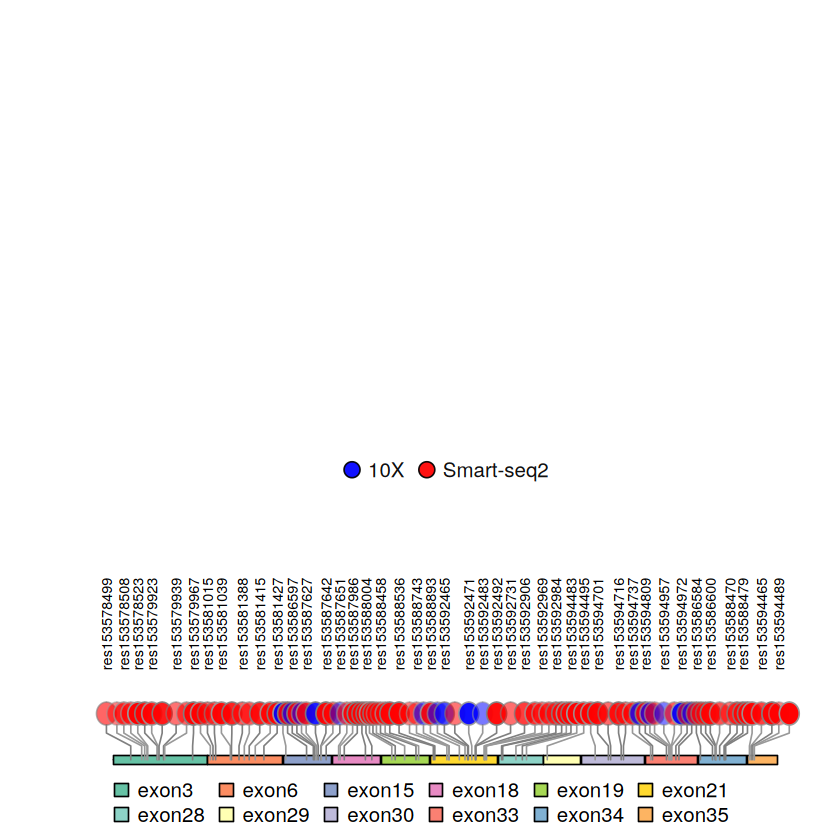

In [148]:
sample.gr$border <- sample(c("grey60", "grey50"), length(all_res), replace=TRUE) #棒子的颜色
sample.gr$alpha <- sample(100:200, length(all_res), replace = TRUE)/200   #设置透明度0-1之间,sample是生成100-200之间的随机数

sample.gr$label <- as.character(1:length(sample.gr)) #球内的字符
sample.gr$label.col <- "black" #球内的标签的颜色

# features$height <- c(0.02, 0.05, 0.04) #块的高度
sample.gr$score <- sample.int(1, length(sample.gr), replace = TRUE) #设置球的数量
sample.gr$legend <- res_info
#pdf("~/FLNA_res_distri_in2plats.pdf")
FLNA_p <- lolliplot(sample.gr, features,yaxis = F,xaxis = F,ylab=F, cex=0.7,family='Times New Roman',legend='legend')#yaxis设置不显示y轴
#dev.off()


In [126]:
#RBFOX1
res_s2 <-  read.table("/disk1/wenqing/tmp_data/10X_smartseq2/result/s2/all_140_ESC/RBFOX1.txt")$V1# 指定SNP 坐标位置
res_10X <- read.table("/disk1/wenqing/tmp_data/10X_smartseq2/result/10X/all_140_ESC/RBFOX1.txt")$V1

all_res <- c(res_s2,res_10X)

all_res_wzSample <- as.data.frame(cbind(all_res,c(rep('Smart-seq2',times=24),rep('10X',times=57))))

intron_widths <- c(300,250,270,80,280,100,290,50)

res_clu <- sort(sample(5:(intron_widths[1]-5),15,replace=F))
res_clu1 <- sort(sample((sum(intron_widths[1])+5):(sum(intron_widths[1:2]-5)),22,replace=F))
res_clu2 <- sort(sample((sum(intron_widths[1:2])+5):(sum(intron_widths[1:3]-5)),21,replace=F))
res_clu3 <- sort(sample((sum(intron_widths[1:3])+5):(sum(intron_widths[1:4]-5)),5,replace=F))
res_clu4 <- sort(sample((sum(intron_widths[1:4])+5):(sum(intron_widths[1:5]-5)),7,replace=F))
res_clu5 <- sort(sample((sum(intron_widths[1:5])+5):(sum(intron_widths[1:6]-5)),2,replace=F))
res_clu6 <- sort(sample((sum(intron_widths[1:6])+5):(sum(intron_widths[1:7]-5)),4,replace=F))
res_clu7 <- sort(sample((sum(intron_widths[1:7])+5):(sum(intron_widths[1:8]-5)),5,replace=F))

res_info <- all_res_wzSample[order(as.numeric(all_res_wzSample[,1],decreasing=F)),]$V2

new_all_res <- c(res_clu,res_clu1,res_clu2,res_clu3,res_clu4,res_clu5,res_clu6,res_clu7)


sample.gr <- GRanges("chr16", IRanges(new_all_res, width=1, names=paste0('res',all_res))) 

intron_start <- c(1,intron_widths[1]+1,sum(intron_widths[1:2])+1,sum(intron_widths[1:3])+1,sum(intron_widths[1:4])+1,sum(intron_widths[1:5])+1,
                    sum(intron_widths[1:6])+1,sum(intron_widths[1:7])+1)



#RBFOX1_intron_bed <- read.table("/disk1/wenqing/tmp_data/RBFOX1_intron.bed")

#sub_RBFOX1_intron_bed <- RBFOX1_intron_bed[c(1,2,4,6,7,8,9,17),]


features <- GRanges("chr16", IRanges(intron_start, # 设置block起使位置
                                    width=intron_widths, # 设置block 的长度
                                    names=c("intron1","intron2","intron4","intron6",
                                    "intron7","intron8","intron9","intron17"))) # 设置名字
                                    


In [116]:
write.table(res_info,"~/tmp.txt",quote=F,row.names=F,col.names=F)

In [127]:
features$fill <- c(brewer.pal(4,"Set2"),brewer.pal(4,"Set3")) #块的颜色

sample.gr$color <- c(rep("blue",2),rep("red",2),rep("blue",4),rep("red",9),rep("blue",15),"red","blue",rep("red",3),
                        rep("blue",28),rep("red",5),rep("blue",4),rep("red",4),rep("blue",3)) #棒子上面的球的颜色


In [128]:
table(sample.gr$color)


blue  red 
  57   24 

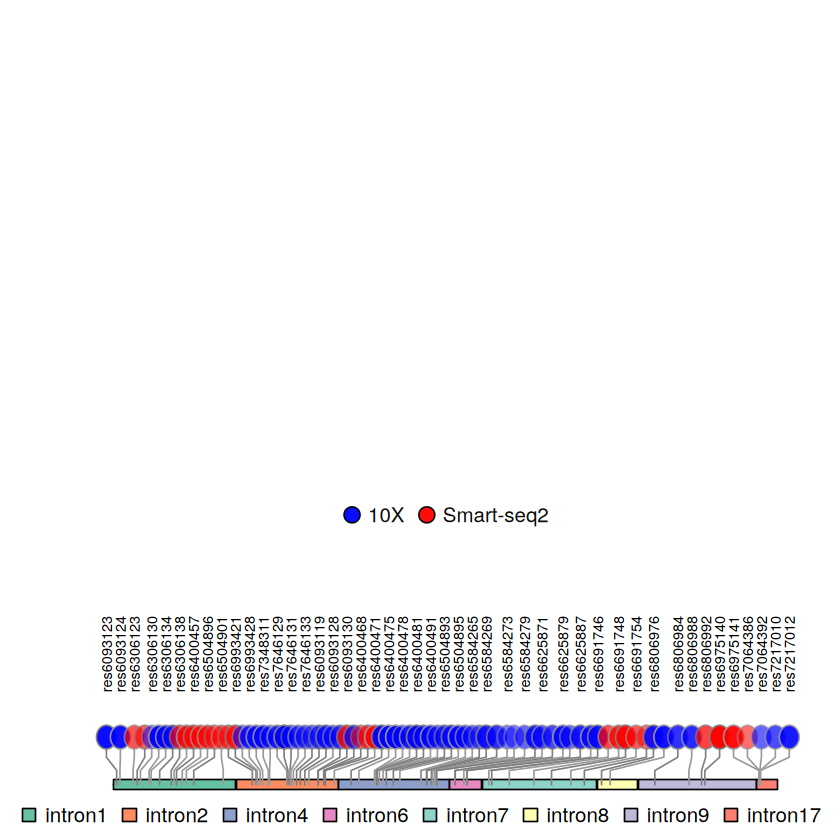

In [130]:
sample.gr$border <- sample(c("grey60", "grey50"), length(all_res), replace=TRUE) #棒子的颜色
sample.gr$alpha <- sample(100:200, length(all_res), replace = TRUE)/200   #设置透明度0-1之间,sample是生成100-200之间的随机数

sample.gr$label <- as.character(1:length(sample.gr)) #球内的字符
sample.gr$label.col <- "black" #球内的标签的颜色

# features$height <- c(0.02, 0.05, 0.04) #块的高度
sample.gr$score <- sample.int(1, length(sample.gr), replace = TRUE) #设置球的数量
sample.gr$legend <- res_info
#pdf("~/res_distri_in2plats.pdf")
RBFOX1_p <- lolliplot(sample.gr, features,yaxis = F,xaxis = F,ylab=F, cex=0.7,family='Times New Roman')#yaxis设置不显示y轴
#dev.off()


In [156]:
pdf("~/2genes_distri_in2plats.pdf")
FLNA_p
RBFOX1_p
dev.off()

[1] 0.4708218

[1] 0.4181223

png 
  2

In [1]:

data <- read.csv("/disk1/wenqing/output_intron_s2.csv")
head(data)



,counts,percentile
,<int>,<int>
1,141,1
2,614,2
3,666,3
4,596,4
5,558,5
6,578,6


In [2]:
library(ggplot2)

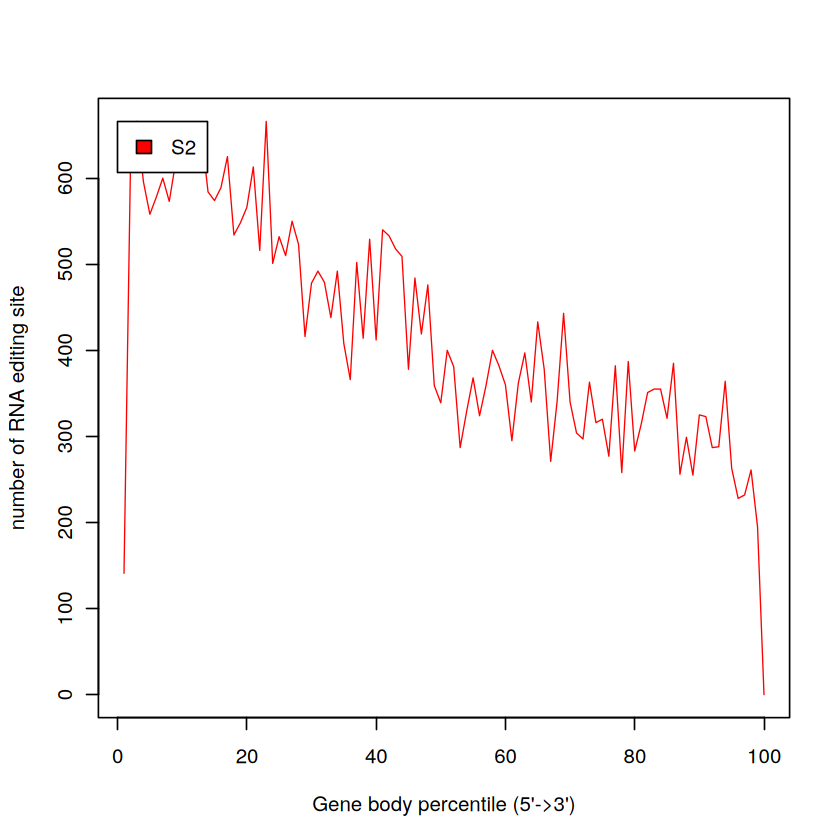

In [3]:
plot(data$percentile,data$counts,type='l',xlab="Gene body percentile (5'->3')", ylab="number of RNA editing site",lwd=0.8,col='red')
legend(0,max(data$counts),fill='red', legend='S2')


In [4]:
sum(data$counts)

[1] 603206

In [13]:
121842/147229

[1] 0.8275679

In [16]:
dat <- read.table("/disk1/wenqing/tmp_data/pbmc/result/10X_Ver3/tmp/regular.res.depth.intron.uniq1")
write.table(dat,"/disk1/wenqing/tmp_data/pbmc/result/10X_Ver3/tmp/regular.res.depth.intron.uniq",quote=F,col.names=F,row.names=F,sep='\t')